# Helicorders
The vdapseisutils Helicorder object takes advantage of ObsPy's dayplot for the basic plotting routines. However, it adds functionality:
- more customization
- plotting catalogs and "tags" (and customizing those markers)
- more control over time tick labels and timezones

Examples below show the default behavior as well as advanced behavior.

In [1]:
import matplotlib.pyplot as plt
from obspy import UTCDateTime
# from vdapseisutils import Helicorder
from vdapseisutils.core.swarmmpl.heli import Helicorder

In [2]:
## Import waveform data

In [3]:
from obspy import read
st_gareloi = read("./output/Helicorders/gareloi_waveform.mseed")
st_goma = read("./output/Helicorders/goma_waveform.mseed")

In [4]:
## ObsPy Dayplot (defaults)

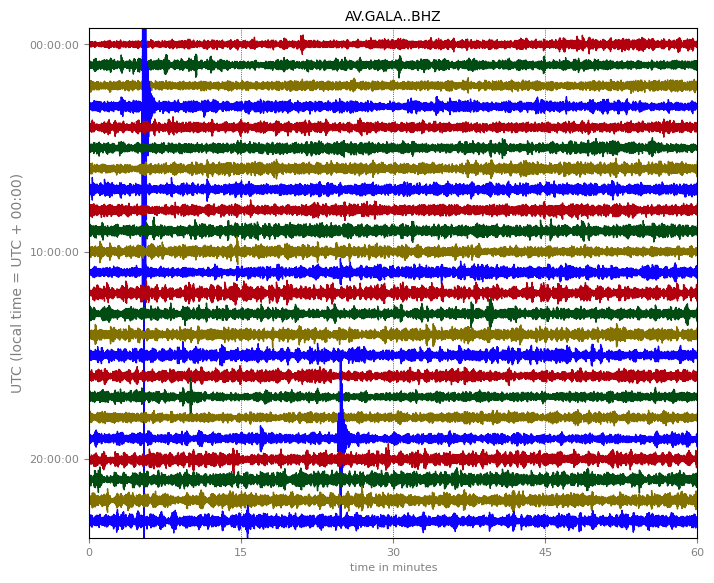

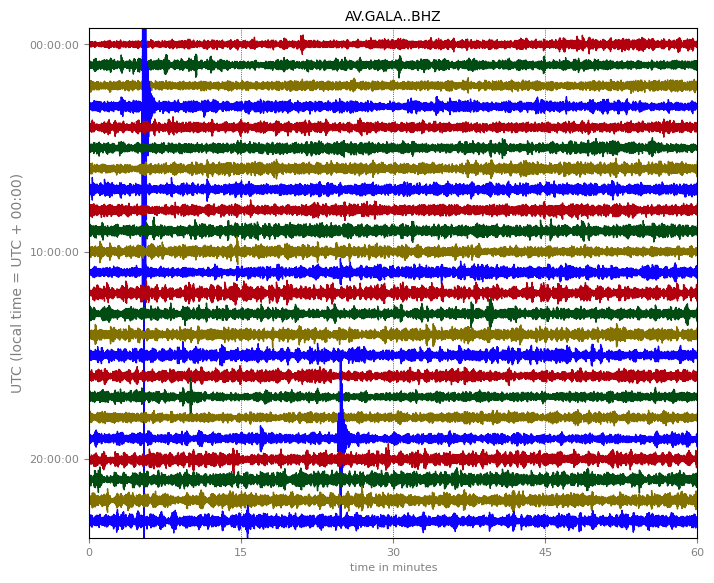

In [5]:
st_gareloi.plot(type="dayplot", interval=60)

## Default behavior (Gareloi, Alaska)

::: HELICORDER :::
Station : AV.GALA..BHZ
Start   : 2021/05/20 00:00
End     : 2021/05/21 00:00
Duration       : 24 hrs 0 min
Interval       : 60 min
One Bar Range  : 4993.040000000037
Clip Threshold : 14979.120000000112



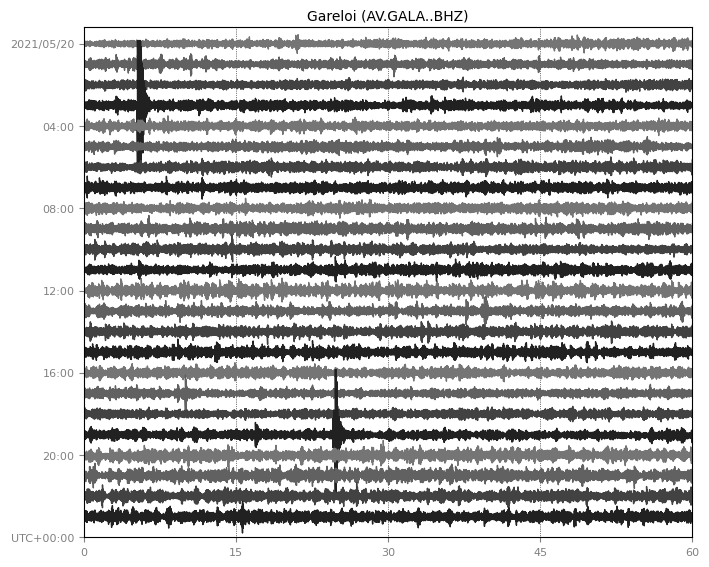

In [10]:
h = Helicorder(st_gareloi, title="Gareloi (" + st_gareloi[0].id + ")", interval=60, clip_threshold="auto")
h.savefig("./output/Helicorders/gareloi_helicorder.png")
h.info()

## Advanced behavior (Goma)

This example shows how to:
- Use colors from SWARM ("blue-scale")
- plot a catalog
- plot tags (timestamps)
- highlight timeperiods
- change the color of the waves; options include
    - "greyscale" (default) 
    - "swarm" SWARM's "blue-scale" gradient
    - "earthworm" Earthworm's black, red, blue, green scheme
    - "obspy" ObsPy's default color scheme for 'dayplot' (red, green, gold, blue)

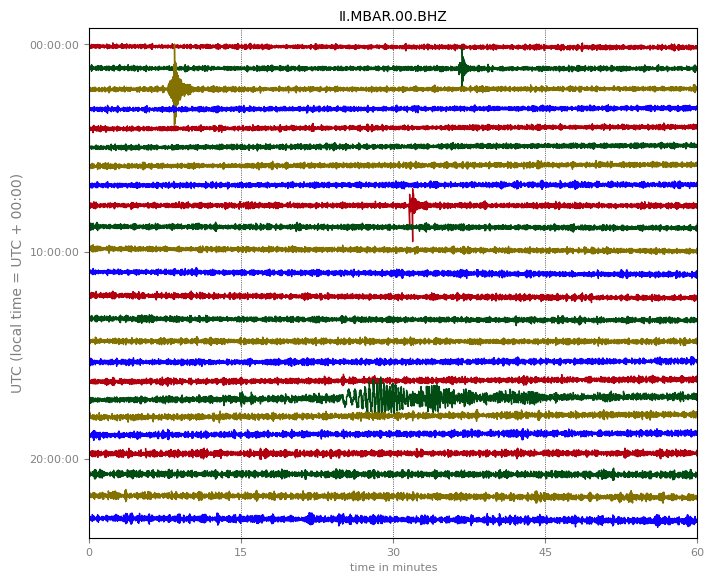

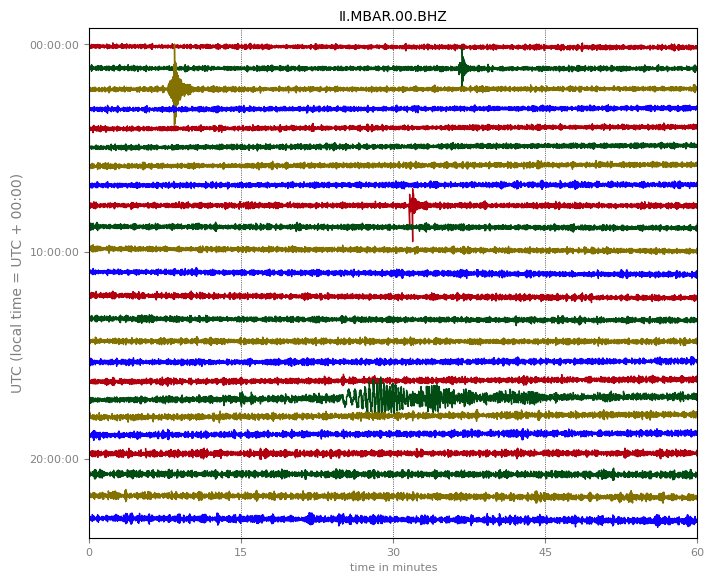

In [7]:
st_goma.plot(type="dayplot", interval=60)

Creating Helicorder... (60 minute interval)


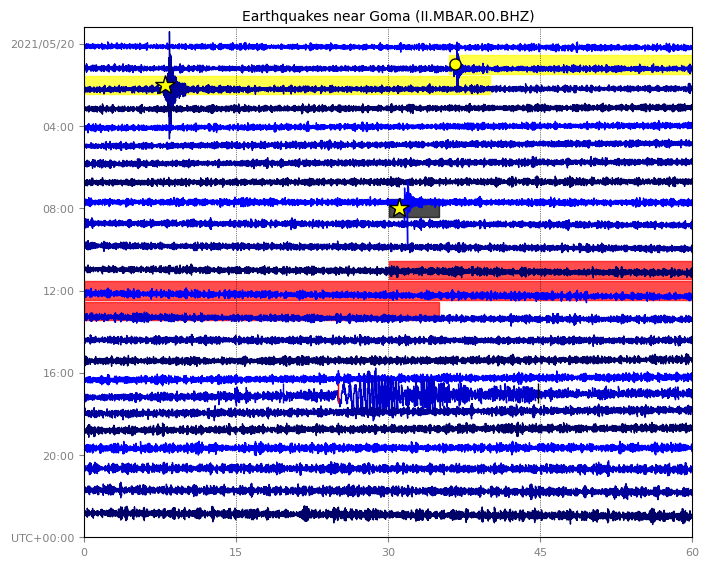

In [8]:
# Make the helicorder
print("Creating Helicorder... (60 minute interval)")
h = Helicorder(st_goma, interval=60,
               color="swarm",  # Apply SWARM's "bluescale" color scheme
               title="Earthquakes near Goma (" + st_goma[0].id + ")",
               )
h.plot_tags(UTCDateTime("2021/05/20 01:36:30"), color="yellow", markersize=8)  # plot a single time
h.plot_tags(UTCDateTime("2021/05/20 17:19:35"), marker="|", markeredgecolor="blue", markersize=15)  # plot a single time as a P arrival
h.plot_tags(UTCDateTime("2021/05/20 17:25:00"), marker="|", markeredgecolor="red", markersize=15)   # plot a single time as a S arrival
h.plot_tags(UTCDateTime("2021/05/20 17:44:45"), marker="|", markeredgecolor="black", markersize=15)  # plot a single time as a coda end
h.plot_tags([UTCDateTime("2021/05/20 08:31:00"), "2021/05/20 02:08:00"], color="yellow", marker="*", markersize=15)  # plot a list of times given in any format
h.highlight([(UTCDateTime("2021/05/20 01:36"), UTCDateTime("2021/05/20 02:40"))])  # spans two lines (at 60')
h.highlight([(UTCDateTime("2021/05/20 08:30"), UTCDateTime("2021/05/20 08:35"))], color="black")  # contained within 1 line (at 60')
h.highlight([(UTCDateTime("2021/05/20 11:30"), UTCDateTime("2021/05/20 13:35"))], color="red")  # spans 3 lines (at 60')
h.savefig("./output/Helicorders/goma_helicorder.png")
plt.show()  # show the helicorder

In [9]:
h.info()

::: HELICORDER :::
Station : II.MBAR.00.BHZ
Start   : 2021/05/20 00:00
End     : 2021/05/20 23:59
Duration       : 23 hrs 59 min
Interval       : 60 min
One Bar Range  : 1925.0
Clip Threshold : 5775.0

